In [1]:
library(tidyverse)
employees <- read_csv("../_build/data/employee_data.csv")
employees$Salary <- parse_number(employees$Salary)
employees$Start_Date <- parse_date(employees$Start_Date, format = "%m/%d/%Y")
degreeLevels <- c("High School", "Associate's", "Bachelor's", "Master's", "Ph.D")
employees$Degree <- parse_factor(employees$Degree, levels = degreeLevels, ordered = TRUE)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --


v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  


-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Parsed with column specification:
cols(
  ID = col_double(),
  Name = col_character(),
  Gender = col_character(),
  Age = col_double(),
  Rating = col_double(),
  Degree = col_character(),
  Start_Date = col_character(),
  Retired = col_logical(),
  Division = col_character(),
  Salary = col_character()
)


# Correlation

Relationships between variables are often at the heart of what we'd like to learn from data. For example:

+ Do students learn better when they get more sleep?
+ How much should a car lease charge per mile used?

Questions such as these relate two quantitative variables and ask whether there is an association between them. Scatterplots are the ideal way to picture such associations, but how does one rigorously summarize an association between two variables? To explore this question, we will return to the `employees` data set. As a reminder, this data set has data on 1,000 employees at a software company, including their income, age, gender and job function. Below we show the first few observations of this data.

In [2]:
head(employees)

ID,Name,Gender,Age,Rating,Degree,Start_Date,Retired,Division,Salary
6881,"al-Rahimi, Tayyiba",Female,51,10,High School,1990-02-23,FALSE,Operations,108804
2671,"Lewis, Austin",Male,34,4,Ph.D,2007-02-23,FALSE,Engineering,182343
8925,"el-Jaffer, Manaal",Female,50,10,Master's,1991-02-23,FALSE,Engineering,206770
2769,"Soto, Michael",Male,52,10,High School,1987-02-23,FALSE,Sales,183407
2658,"al-Ebrahimi, Mamoon",Male,55,8,Ph.D,1985-02-23,FALSE,Corporate,236240
1933,"Medina, Brandy",Female,62,7,Associate's,1979-02-23,TRUE,Sales,NA


Now let's create a scatter plot depicting the relationship between annual income and age in years:

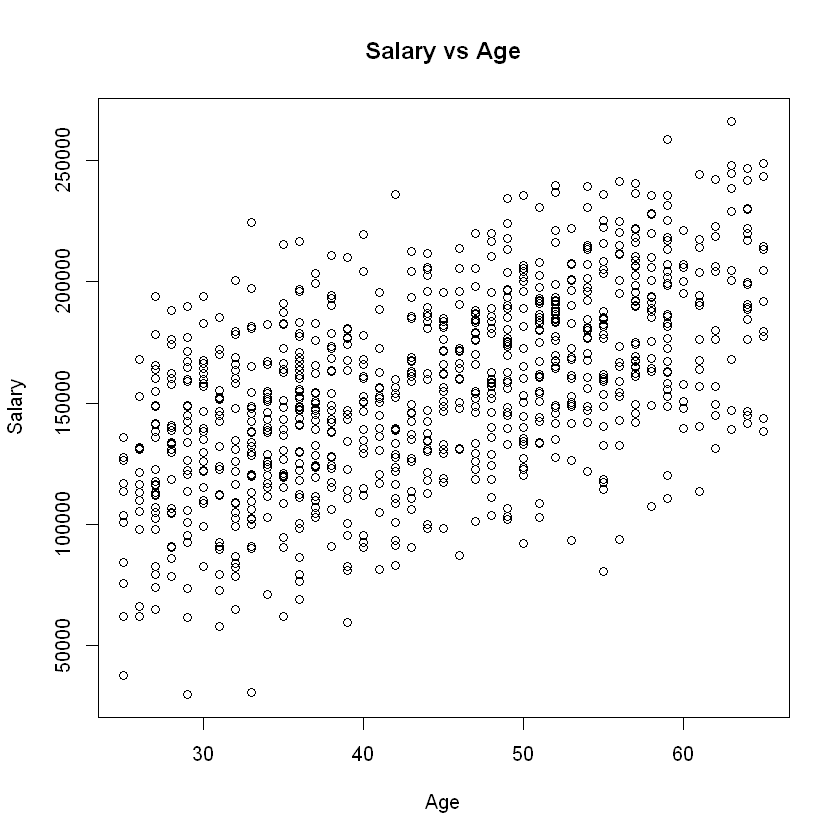

In [3]:
plot(employees$Age, employees$Salary, 
        main="Salary vs Age",
        xlab="Age",
        ylab="Salary")

We might describe this plot as having a "moderate, positive relationship" between income and employee age. The strength of this relationship can be summarized by a statistical measure called the **correlation coefficient**, or simply the **correlation**.

The correlation, denoted $r$, is a value between -1 and 1 and measures the direction and strength of a linear relationship between two variables. In short, how well would a line fit our observed data? If the correlation is positive, then on average as one variable rises the other variable rises as well. If the correlation is negative, then on average as one variable rises the other variable falls. Keep in mind that correlation is a measure of *linear* relationship. Thus, a correlation of zero means that there is no *linear* relationship between two variables, but there could be a non-linear relationship. For example, in the chart below, $X$ and $Y$ are clearly related, but not in a linear fashion. Indeed, the correlation between $X$ and $Y$ in the graph below is zero.

```{figure} ../_build/images/correlation_nonlinear.png
---
height: 400px
align: center
name: corr_nonlinear
---
Correlation of a Non-Linear Relationship
```

A rough rule of thumb table for how to interpret the correlation in absolute value \|$r$\| is as follows:

| \|$r$\| | Interpretation |
| :-: | :-: |
| 0 - 0.2 | Very weak |
| 0.2 - 0.4 | Weak to moderate |
| 0.4 - 0.6 | Medium to substantial |
| 0.6-0.8 | Very strong |
| 0.8-1.0 | Extremely strong |

In R, we can compute correlation using the command `cor()`:

```{admonition} Syntax
`cor(x, y, use = "everything")`
+ *Required arguments*
  - `x`: A numeric vector that represents the $X$ variable.
  - `y`: A numeric vector that represents the $Y$ variable.
+ *Optional arguments*
  - `use`: If `use` equals `"everything"`, all observations are used to calculate the correlation. If `use` equals `"complete.obs"`, only the **obs**ervations that **complete** (*i.e.*, that are not missing values for either variable) are used. 
```

For example, we can use `cor()` to calculate the correlation between `Salary` and `Age` in the `employees` data. Note that we set `use="complete.obs"` because `Salary` is missing for some of the observations in the data set.

In [4]:
cor(employees$Age, employees$Salary, use = "complete.obs")

[1] 0.5635125

In [5]:
print(cor(employees$Age, employees$Salary, use = "complete.obs"))

[1] 0.5635125


The R command `cor.test()` returns the correlation between two variables, as well as a 95% confidence interval for the population correlation. It also returns the p-value of a hypothesis where the null and alternative hypotheses are:

+ $H_o$: $r = 0$ (the population correlation equals zero)
+ $H_a$: $r \ne 0$ (the population correlation does not equal zero)

The `cor.test()` function uses the following syntax:

```{admonition} Syntax
`cor.test(x, y, alternative = "two.sided")`
+ *Required arguments*
  - `x`: A numeric vector that represents the $X$ variable.
  - `y`: A numeric vector that represents the $Y$ variable.
+ *Optional arguments*
  - `use`: If `alternative` equals `"two.sided`, the **alternative** hypothesis is $r \ne 0$. If `alternative` equals `"less`, the **alternative** hypothesis is $r \le 0$. If `alternative` equals `"greater`, the **alternative** hypothesis is $r \ge 0$.
```

In [6]:
cor.test(employees$Age, employees$Salary)


	Pearson's product-moment correlation

data:  employees$Age and employees$Salary
t = 20.668, df = 918, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5177359 0.6060718
sample estimates:
      cor 
0.5635125 


One must remember that the correlation shown in the output (0.56) is a **point estimate** based on our sample data and should *not* be interpreted as the true correlation between the variables in the full population. If we were to draw a different sample, the resulting estimate would almost certainly be different. Although we cannot calculate the true correlation from the sample data, we can calculate a range of values (called a **confidence interval**) where we believe it is very likely the true population correlation lies. For example, based on the output above, we are 95% confident that the true population correlation lies between 0.52 and 0.61.

The result also tells us that the correlation coefficient is statistically significant at the 95% level because (1) the p value is less than 0.05 and (2) the 95% confidence interval does not contain zero. These are equivalent tests: the p value is less than 0.05 if, and only if, the 95% confidence interval does not contain zero.

## Correlation is Not Causation

Although the correlation coefficient measures the strength of a linear relationship between two variables, it provides no information about cause or effect. A high correlation may imply that two variables move in tandem, but it does *not* imply that one causes the other. For example, there is a high correlation between the number of fire fighters at a fire and the dollar amount of the resulting damage. However, this does *not* mean that fire fighters cause damage. In this case there is a third variable (called a **confounding variable**) - the size of the fire. The confounding variable is causally related to the other two variables; a larger fire causes more damage, *and* causes more fire fighters to show up. One must always consider whether an observed correlation can be explained by a confounding variable.

```{warning}
Correlation does not imply causation.
```

## The Correlation Matrix

If we have several variables, we can create a **correlation matrix**, which lists the correlations between each pair of variables. As an example, the following R code will create a correlation matrix between the `Age`, `Rating`, and `Salary` variables in the `employees` data. Note that this is the same `cor()` command that we saw above; instead of passing in two numeric vectors `x` and `y`, we can pass in a data frame and `cor()` will calculate the correlation between all of the variables in the data frame.

In [7]:
cor(employees[,c("Age", "Rating", "Salary")], use = "complete.obs")

,Age,Rating,Salary
Age,1.00000000,0.06199581,0.5635125
Rating,0.06199581,1.00000000,0.3064684
Salary,0.56351248,0.30646840,1.0000000


From the results, we learn, for example, that the correlation between `Salary` and `Rating` is 0.3065. The matrix is symmetric, meaning that the correlation of `Salary` and `Rating` is the same as the correlation of `Rating` and `Salary`. The diagonal of this matrix is all ones, indicating that the correlation of a variable with itself is one.